# Clustering Basic (DataMining)

## K-means Clustering with R

In [2]:
library(cluster)
library(NbClust)
library(kohonen)
library(ggplot2)
library(gridExtra)
library(scales)

In [4]:
# Read Data
cdata <- read.delim("Cluster.txt", stringsAsFactors=FALSE)

In [5]:
head(cdata)

,ID,MONEY,VISIT,CROSS,API
1,1,367900,15,3,14
2,2,64000,3,1,109
3,3,467400,10,8,12
4,4,61000,3,1,70
5,5,128000,4,2,45
6,6,353620,6,5,22


In [6]:
set.seed(1)
km <- kmeans(subset(cdata, select=-c(ID)), centers=4)
str(km)

List of 9
 $ cluster     : Named int [1:1000] 2 2 2 2 2 2 1 2 2 2 ...
  ..- attr(*, "names")= chr [1:1000] "1" "2" "3" "4" ...
 $ centers     : num [1:4, 1:4] 1.28e+06 2.55e+05 1.13e+07 3.42e+06 3.26e+01 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "1" "2" "3" "4"
  .. ..$ : chr [1:4] "MONEY" "VISIT" "CROSS" "API"
 $ totss       : num 1.65e+15
 $ withinss    : num [1:4] 2.80e+13 2.77e+13 1.42e+14 3.39e+13
 $ tot.withinss: num 2.32e+14
 $ betweenss   : num 1.42e+15
 $ size        : int [1:4] 181 770 8 41
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [9]:
km

K-means clustering with 4 clusters of sizes 181, 770, 8, 41

Cluster means:
       MONEY      VISIT     CROSS       API
1  1284818.8  32.607735 10.966851  7.232044
2   255051.4   8.124675  3.654545 34.877922
3 11323243.8 101.125000 20.750000  0.750000
4  3421840.0  62.146341 15.390244  3.024390

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   2    2    2    2    2    2    1    2    2    2    1    2    1    2    1    2 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   2    2    2    1    2    2    1    1    2    2    1    2    1    1    2    2 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   3    4    1    2    2    2    2    2    2    2    2    2    2    2    2    2 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    2    2    2    1    1    1    2    2    2    2    2    2    2    4    3 
  65   66   67   68   69   70   71  

### 군집의 반경과 관계를 2차원으로 도식
 - 군집간의 유사성도 알 수 있다.
 - Too many Outliers 
  - 모양이 좋지 않다.

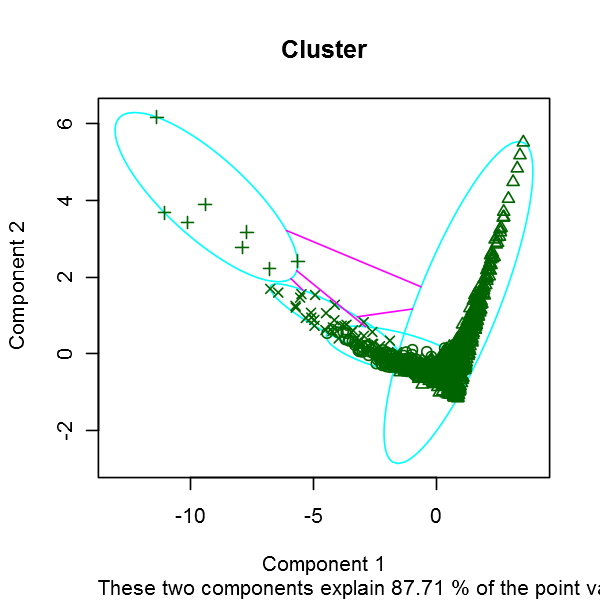

In [10]:
options(repr.plot.width=5,repr.plot.height=5)
clusplot(subset(cdata, select=-c(ID)), km$cluster, main="Cluster")

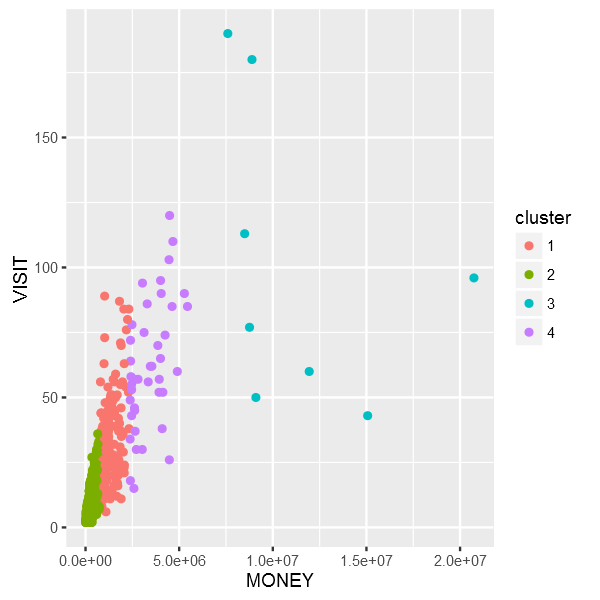

In [11]:
# 군집의 분포를 도식
cdata$cluster <- as.factor(km$cluster)
qplot(MONEY, VISIT, colour=cluster, data=cdata)

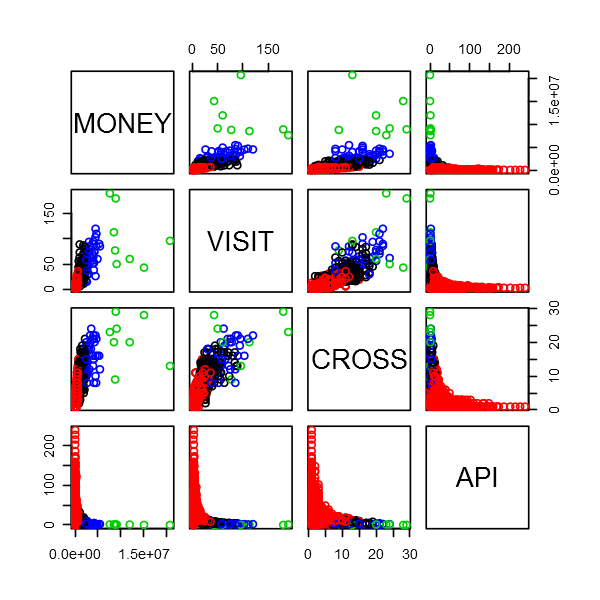

In [13]:
plot(subset(cdata, select=-c(ID,cluster)), col=km$cluster)

### 군집별로 각 군집화변수의 밀도를 도식: 방법1
 - 2번 Cluster는 자주오지도 많이 사지도 않는 뜨내기 고객.

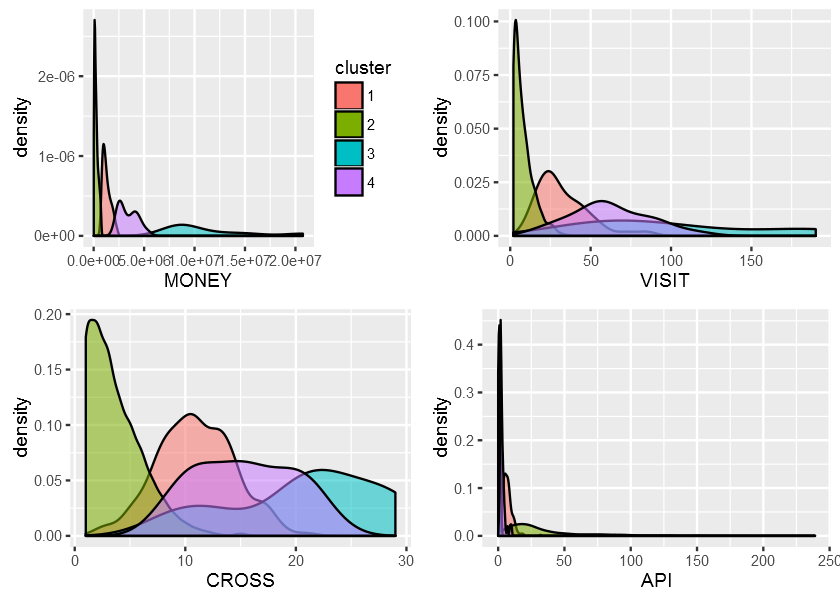

In [15]:
options(repr.plot.width=7,repr.plot.height=5)
p1 <- qplot(MONEY, fill=cluster, alpha=.5, data=cdata, geom="density") + scale_alpha(guide="none")
p2 <- qplot(VISIT, fill=cluster, alpha=.5, data=cdata, geom="density") + theme(legend.position="none")
p3 <- qplot(CROSS, fill=cluster, alpha=.5, data=cdata, geom="density") + theme(legend.position="none")
p4 <- qplot(API, fill=cluster, alpha=.5, data=cdata, geom="density") + theme(legend.position="none")
grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

### 군집별로 각 군집화변수의 밀도를 도식: 방법2

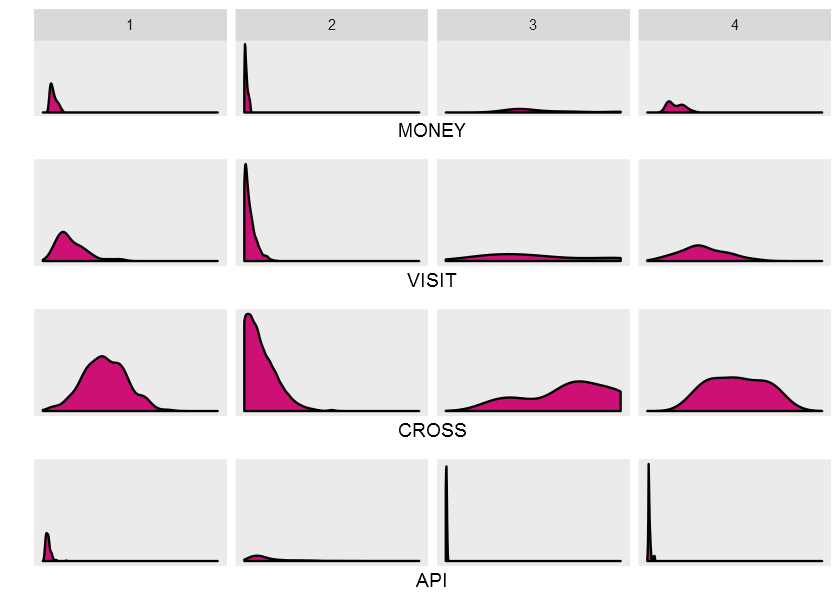

In [16]:
p1 <- ggplot(cdata, aes(MONEY)) + geom_density(fill='deeppink3', adjust=1) + facet_grid(. ~ cluster) + scale_x_continuous(breaks=NULL) + scale_y_continuous("", breaks=NULL)
p2 <- ggplot(cdata, aes(VISIT)) + geom_density(fill='deeppink3', adjust=1) + facet_grid(. ~ cluster) + scale_x_continuous(breaks=NULL) + scale_y_continuous("", breaks=NULL) + theme(strip.text.x=element_blank())
p3 <- ggplot(cdata, aes(CROSS)) + geom_density(fill='deeppink3', adjust=1) + facet_grid(. ~ cluster) + scale_x_continuous(breaks=NULL) + scale_y_continuous("", breaks=NULL) + theme(strip.text.x=element_blank())
p4 <- ggplot(cdata, aes(API)) + geom_density(fill='deeppink3', adjust=1) + facet_grid(. ~ cluster) + scale_x_continuous(breaks=NULL) + scale_y_continuous("", breaks=NULL) + theme(strip.text.x=element_blank())
grid.arrange(p1, p2, p3, p4, ncol=1, nrow=4)

### 군집의 크기를 도식

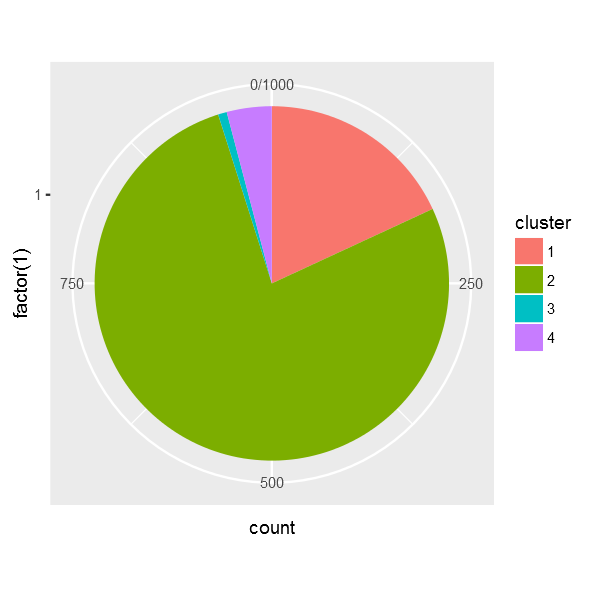

In [19]:
options(repr.plot.width=5,repr.plot.height=5)
x <- ggplot(cdata, aes(x=factor(1), fill=cluster))
x + geom_bar(width=1) + coord_polar(theta="y")

## Determining the optimal number of clusters
### 1. 최적의 군집 수 찾기: 방법1

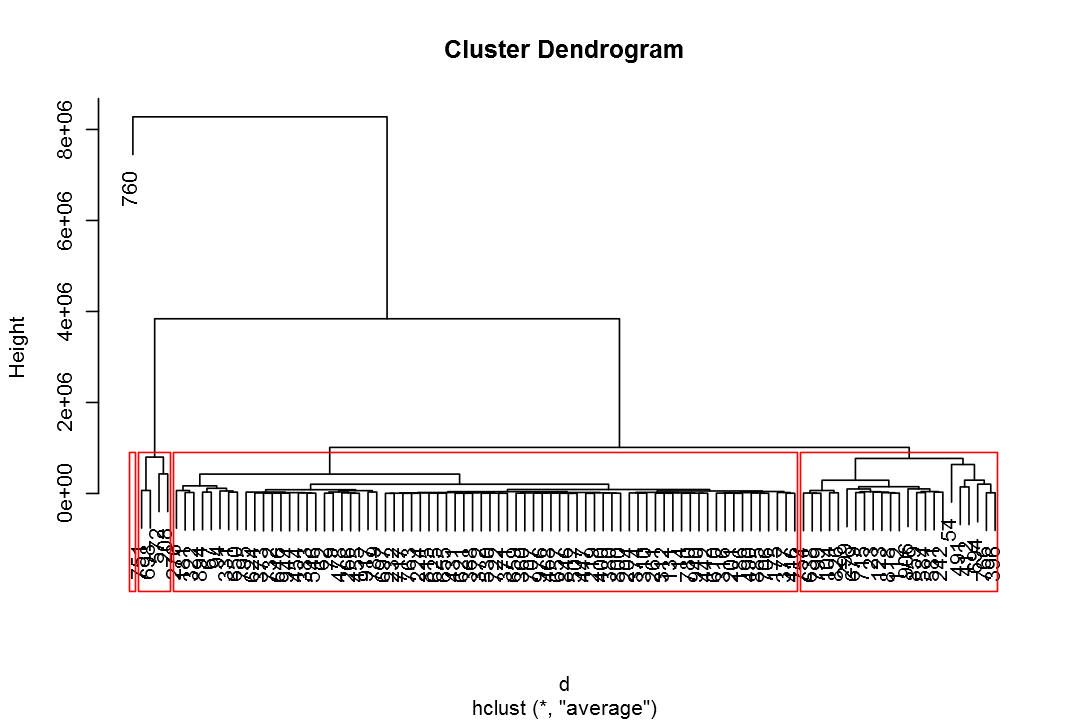

In [22]:
# 최적의 군집 수 찾기: 방법1
options(repr.plot.width=9,repr.plot.height=6)
set.seed(1)
sd <- cdata[sample(1:nrow(cdata),100),-1]
d <- dist(sd, method = "euclidean")
fit <- hclust(d, method="ave")
plot(fit)
# CutTree 형태로 Cluster Cut. k=n
rect.hclust(fit, k=4, border = "red")

### 2. 최적의 군집 수 찾기: 방법2 
 - 군집내 분산이 적고 군집간 분산이 큰 것을 찾기.
  - $tot.withinss$ 군집 내 분산의 합
 - 기울기가 급격히 감소하는 지점에서 군집 수를 정함

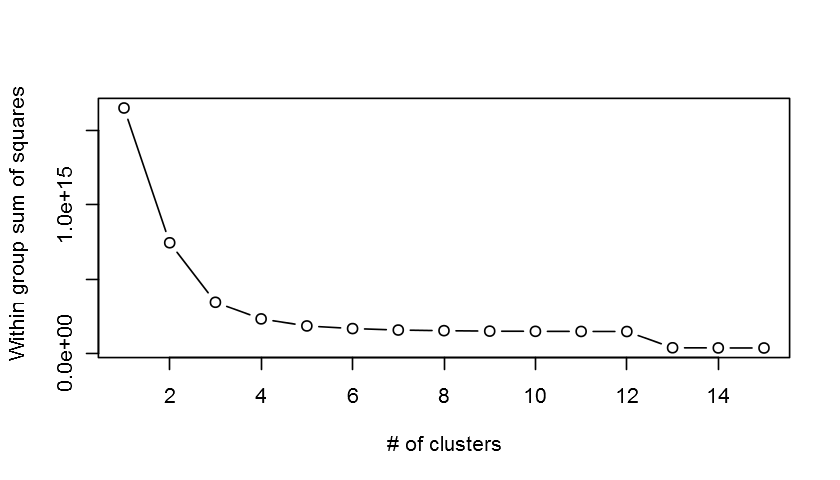

In [24]:
# 최적의 군집 수 찾기: 방법2
options(repr.plot.width=7,repr.plot.height=4)
wss <- 0; set.seed(1)
for(i in 1:15) wss[i] <- kmeans(subset(cdata, select=-c(ID)), centers=i)$tot.withinss
plot(1:15, wss, type="b", xlab="# of clusters", ylab="Within group sum of squares")

### 3. 최적의 군집 수 찾기: 방법3

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


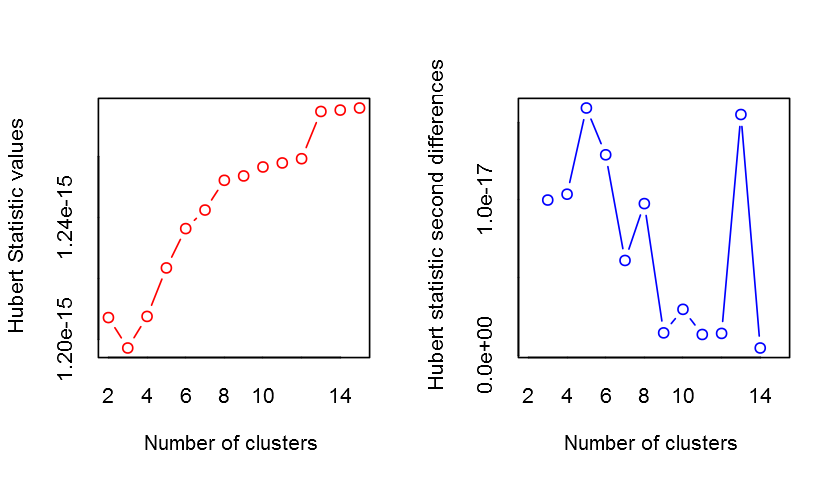

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 2 as the best number of clusters 
* 5 proposed 3 as the best number of clusters 
* 1 proposed 11 as the best number of clusters 
* 2 proposed 12 as the best number of clusters 
* 7 proposed 13 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


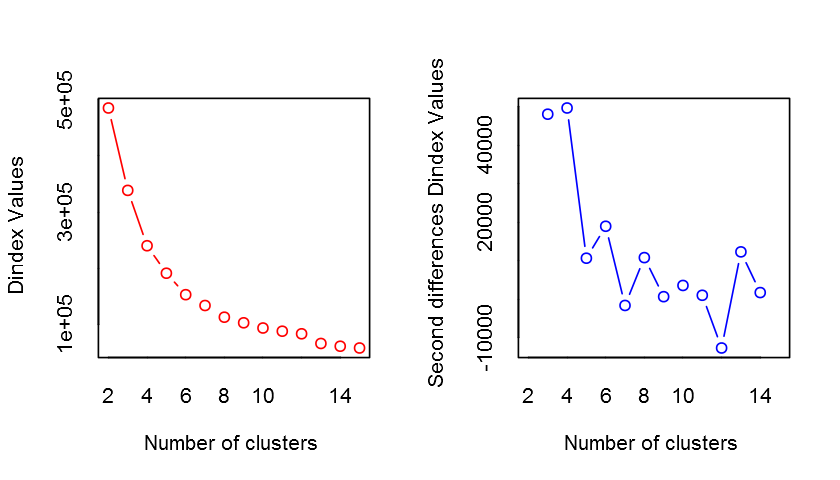

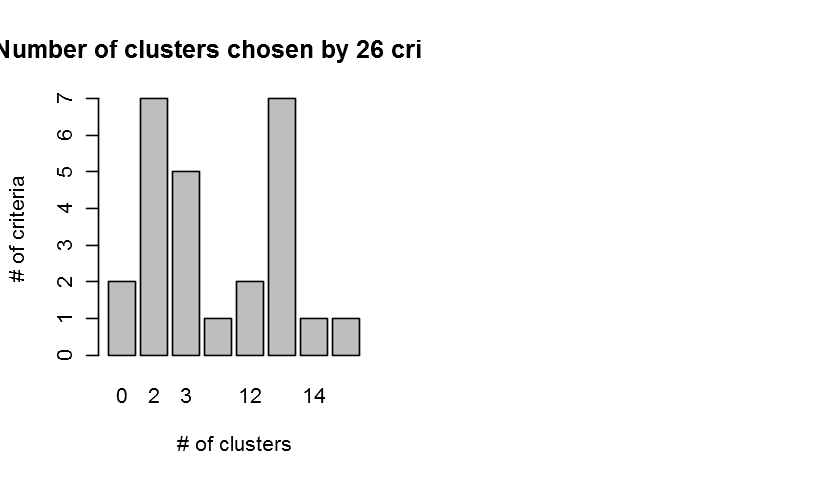

In [25]:
nc = NbClust(subset(cdata, select=-c(ID,cluster)), min.nc=2, max.nc=15, method='kmeans') # 2 ~ 15개 kmeans를 비교.
barplot(table(nc$Best.nc[1,]), xlab="# of clusters", ylab="# of criteria", main="Number of clusters chosen by 26 criteria")